**Image Smoothing**

Smoothing filter is used for blurring and noise reduction in the image. Blurring is pre-processing steps for removal of small details and Noise Reduction is accomplished by blurring

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Mean Filtering**

The idea is replacing the value of every pixel in an image by the average of the pixel levels in the neighborhood define by the filter mask.

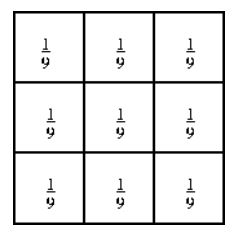

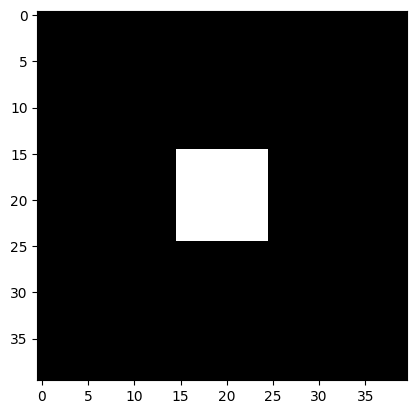

In [ ]:
#Demo using square

im_sq = np.zeros((40,40),dtype = 'uint8')

im_sq[15:25,15:25] = im_sq[0,0] + 255

# im_sq[7:13,7:13] = im_sq[0,0] + 255

plt.imshow(im_sq,cmap = 'gray')
plt.show()

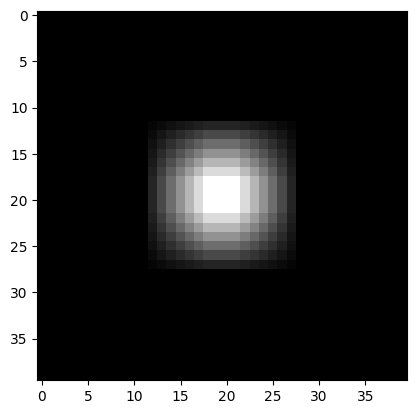

In [ ]:
#Mean Filter

ksize = 7

kernel = np.ones((ksize,ksize), np.float32)/ksize**2

dst_sq = cv2.filter2D(im_sq,-1,kernel)   #filter2D (src, dst, ddepth, kernel)

#ddepth can be CV_8U, CV_8S, CV_16U, CV_32S, CV_32F, CV_64F

plt.imshow(dst_sq, cmap = 'gray')
plt.show()


**Median Filtering**

First neighboring pixels are sorted and original values of the pixel is replaced by the median of the list.

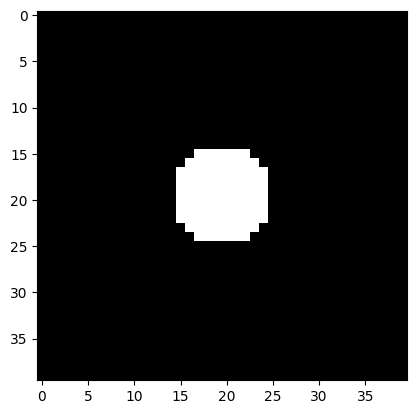

In [ ]:
median_sq = cv2.medianBlur(im_sq, 5)


plt.imshow(median_sq,cmap = 'gray')
plt.show()

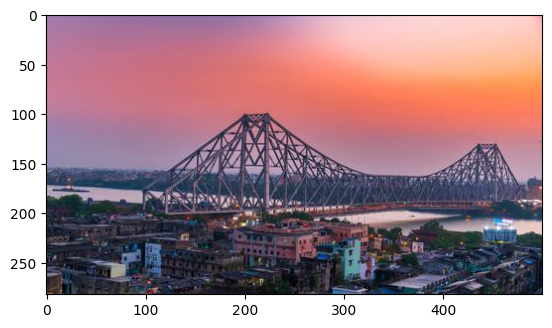

In [ ]:
im_br = cv2.imread('imagekolkata.jpg')

im_cor = cv2.cvtColor(im_br, cv2.COLOR_BGR2RGB)

plt.imshow(im_cor)
plt.show()

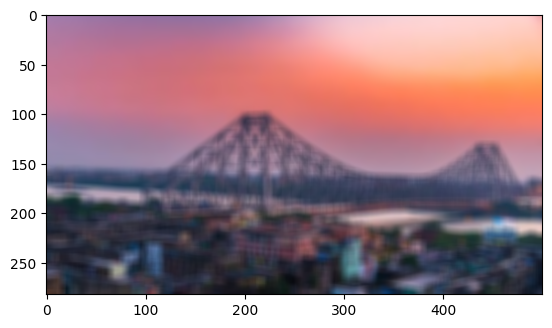

In [ ]:
ksize = 9

kernel = np.ones((ksize,ksize), np.float32)/ksize**2


im_smooth = cv2.filter2D(im_cor,-1,kernel)

plt.imshow(im_smooth)
plt.show()

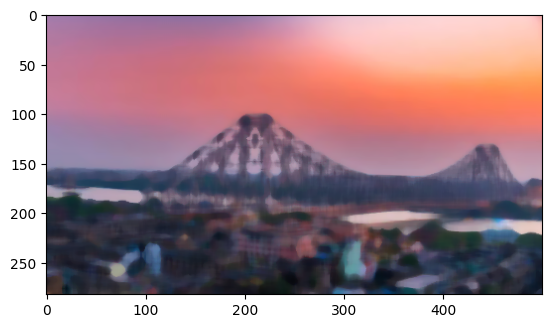

In [ ]:
median1 = cv2.medianBlur(im_cor, 9)

plt.imshow(median1)
plt.show()

*********************************************
*********************************************

**APPLICATION, NOISE REMOVAL**

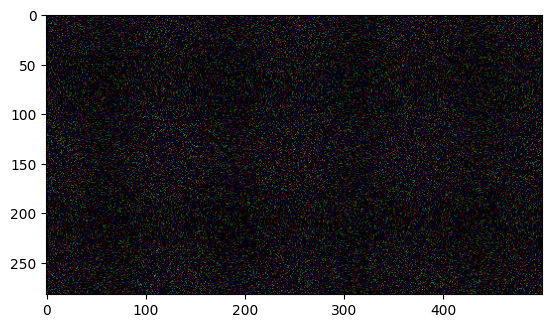

In [ ]:
noise = 100*np.random.rand(*im_cor.shape)

noise[noise<90] = 0

# noise

noise1 = noise.astype('uint8')

plt.imshow(noise1)
plt.show()

In [ ]:
#Adding Noise to Image

im1 = im_cor + noise 

#Clipping the noise withing range
im1[im1 > 255] = 255


#Converting float values to integers
im1 = im1.astype('uint8')

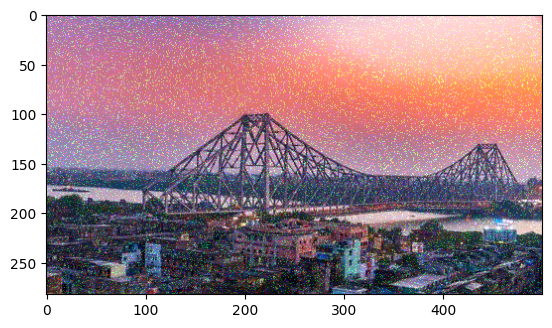

In [ ]:
plt.imshow(im1)
plt.show()

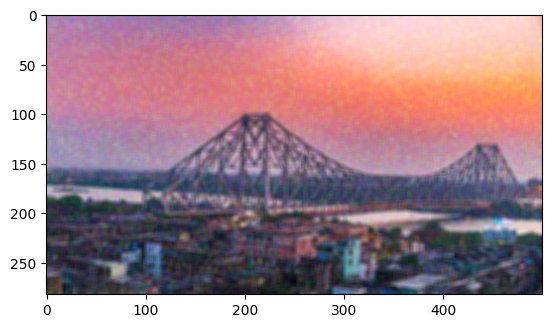

In [ ]:
#smoothing Kernel

ksize = 5

kernel = np.ones((ksize,ksize), np.float32)/ksize**2

# print(kernel)

dst = cv2.filter2D(im1,-1,kernel)

plt.imshow(dst)
plt.show()

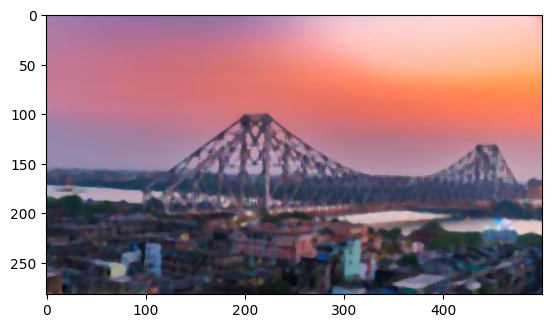

In [ ]:
median1 = cv2.medianBlur(im1, 5)
# compare = np.concatenate((im1, median), axis=1) #side by side comparison

plt.imshow(median1)
plt.show()


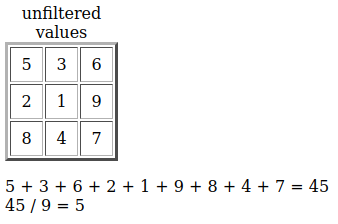

**Now suppose in place of 9 the pixel value is 255 (outlier), then the mean is (5+3+6+2+1+255+8+4+7)/9 = 37;
But the median is obtained from sorting the 9 values 1,2,3,4,5,6,7,8,255; which is 5**

On Gray Scale Image

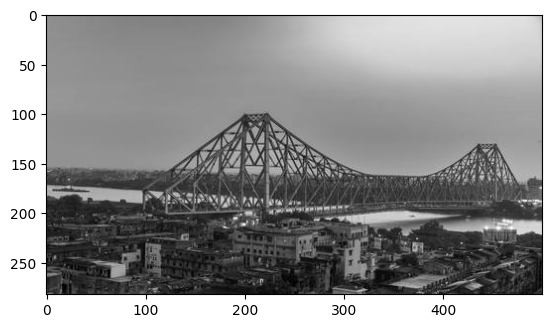

In [ ]:
#Conversion to Gray scale

im_gray = cv2.cvtColor(im_br, cv2.COLOR_BGR2GRAY)

plt.imshow(im_gray, cmap = 'gray')
plt.show()

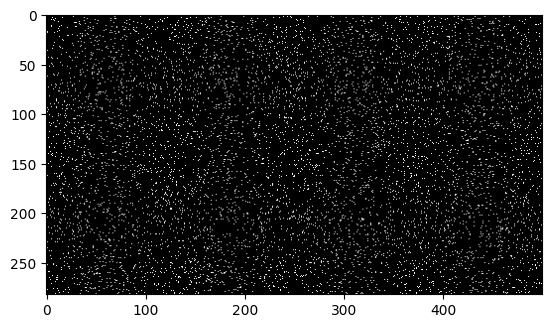

In [ ]:
noise2 = 100*np.random.rand(*im_gray.shape)

noise2[noise2<95]=0

plt.imshow(noise2, cmap = 'gray')
plt.show()

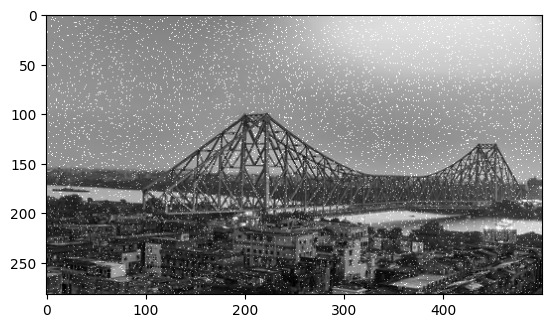

In [ ]:
im2 = im_gray + noise2

im2[im2>255] = 255

im2 = im2.astype('uint8')

plt.imshow(im2, cmap = 'gray')
plt.show()

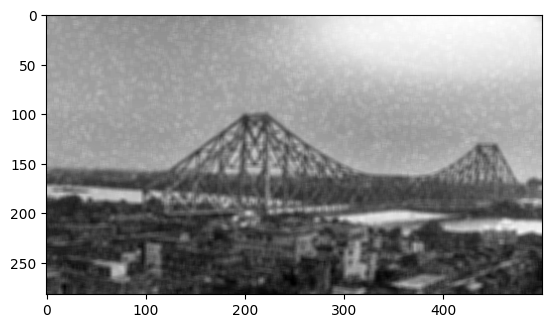

In [ ]:
ksize = 5

kernel = np.ones((ksize,ksize), np.float32)/ksize**2

dst1 = cv2.filter2D(im2,-1,kernel)  #-1 means output have same ddepth as input

plt.imshow(dst1, cmap = 'gray')
plt.show()

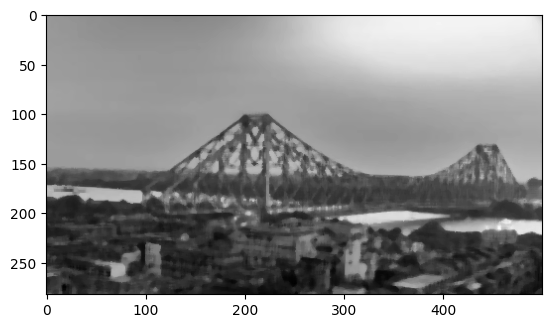

In [ ]:
#Median Filtering

median = cv2.medianBlur(im2, 5)
compare = np.concatenate((im2, median), axis=1) #side by side comparison

plt.imshow(median,cmap='gray')
plt.show()


Gaussian Filtering

Gaussian Kernel for smoothing

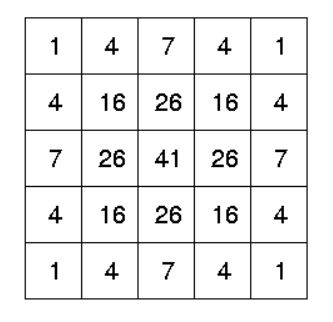

cv2.GaussianBlur(img, ksize, sigmax, sigmay, border)

if sigmax and sigmay are not >0, then sigma is calculated from ksize with the formula

sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8. [WHY???]

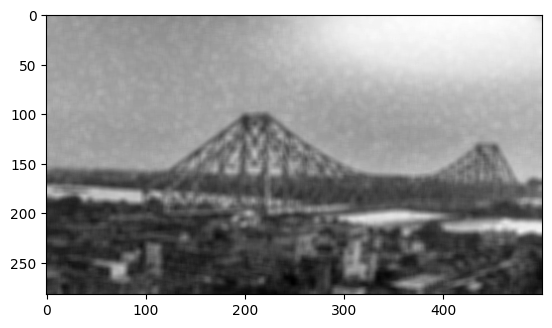

In [ ]:
# im_gray_blur = cv2.GaussianBlur(im_gray, (7,7),cv2.BORDER_DEFAULT)  
im_gray_blur = cv2.GaussianBlur(im2, (7,7),cv2.BORDER_DEFAULT)  

#borders

#cv2.BORDER_CONSTANT  - adds constant border with value given as argument
#cv2.BORDER_REPLICATE  -  aaaaaa||abcdefg||ggggggg
#cv2.BORDER_REFLECT  -  gfedcba||abcdefg||gfedcba
#cv2.BORDER_REFLECT101/ cv2.BORDER_DEFAULT -  gfedcb||abcdefgh||gfedcba


# plt.imshow(im_gray_blur,cmap = 'gray')
plt.imshow(im_gray_blur,cmap = 'gray')
plt.show()

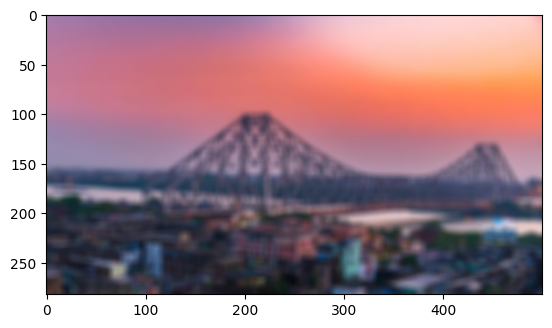

In [ ]:
im_gauss = cv2.GaussianBlur(im_cor, (9,9),cv2.BORDER_DEFAULT)

plt.imshow(im_gauss)
plt.show()

**Let's Try to sharpen the blurred image**


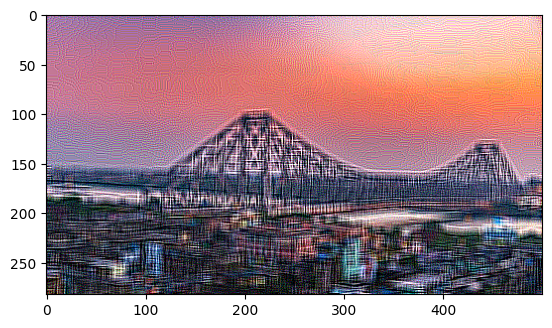

In [ ]:
#https://setosa.io/ev/image-kernels/

#The sharpen kernel emphasizes differences in adjacent pixel values. This makes the image look more vivid.



kernel_sharp = np.array([[-1,-1,-1], 
                    [-1, 9,-1],
                    [-1,-1,-1]])
sharpened_br = cv2.filter2D(im_gauss, -1, kernel_sharp)
sharpened_br = cv2.filter2D(sharpened_br, -1, kernel_sharp)

plt.imshow(sharpened_br) 

Effects of Different levels of smoothing

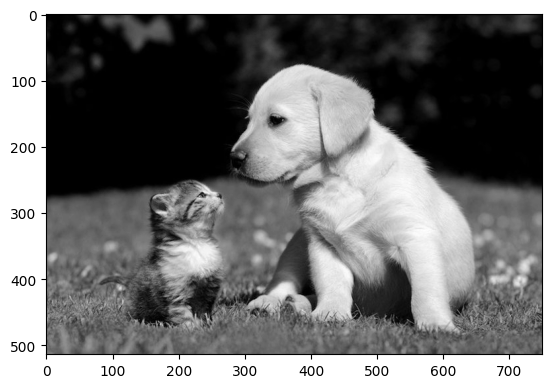

In [ ]:
im_cat = cv2.imread('cat dog.jpg')

im_cat_gray = cv2.cvtColor(im_cat, cv2.COLOR_BGR2GRAY)

plt.imshow(im_cat_gray,cmap = 'gray')
plt.show()

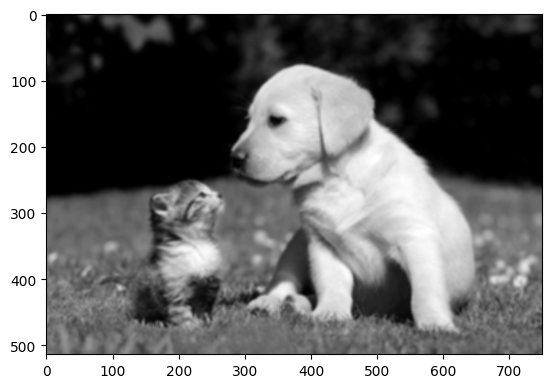

In [ ]:
im_cat_gray_blur1 = cv2.GaussianBlur(im_cat_gray, (5,5), cv2.BORDER_DEFAULT)

plt.imshow(im_cat_gray_blur1,cmap = 'gray')
plt.show()

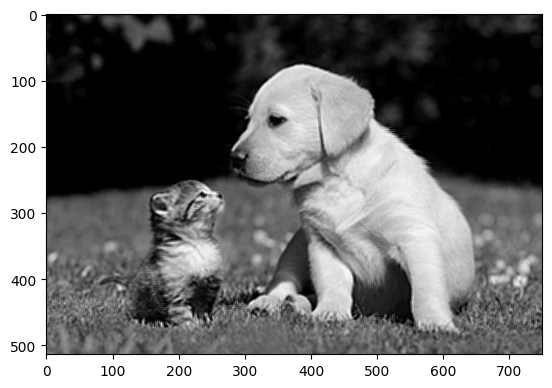

In [ ]:
kernel = np.array([[-1,-1,-1], 
                    [-1, 9,-1],
                    [-1,-1,-1]])
sharpened = cv2.filter2D(im_cat_gray_blur1, -1, kernel)

plt.imshow(sharpened, cmap='gray')

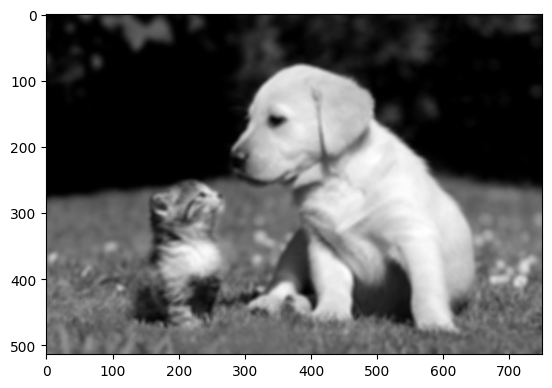

In [ ]:
im_cat_gray_blur2 = cv2.GaussianBlur(im_cat_gray, (7,7), cv2.BORDER_DEFAULT)

plt.imshow(im_cat_gray_blur2,cmap = 'gray')
plt.show()

In [ ]:
im_cat_dogauss = im_cat_gray_blur1 - im_cat_gray_blur2

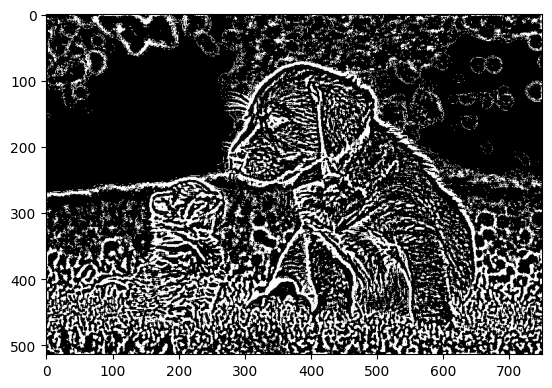

In [ ]:
plt.imshow(im_cat_dogauss, cmap = 'gray')

In [ ]:
im_cat_gray_blur3 = cv2.GaussianBlur(im_cat_gray, (9,9), cv2.BORDER_DEFAULT)

# plt.imshow(im_cat_gray_blur3,cmap = 'gray')
# plt.show()

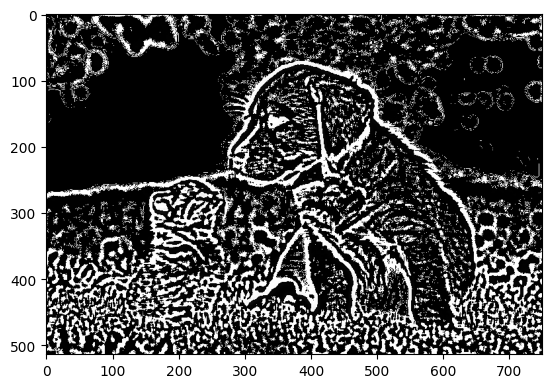

In [ ]:
im_cat_dogauss1 = im_cat_gray_blur2- im_cat_gray_blur3

plt.imshow(im_cat_dogauss1,cmap='gray')
plt.show()

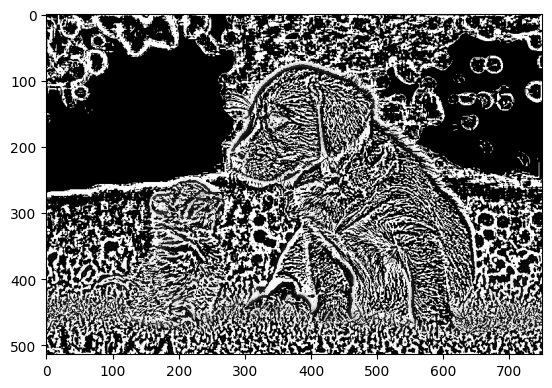

In [ ]:
im_cat_dogauss2 = im_cat_gray - im_cat_gray_blur3

plt.imshow(im_cat_dogauss2, cmap = 'gray')

**Image Gradient**

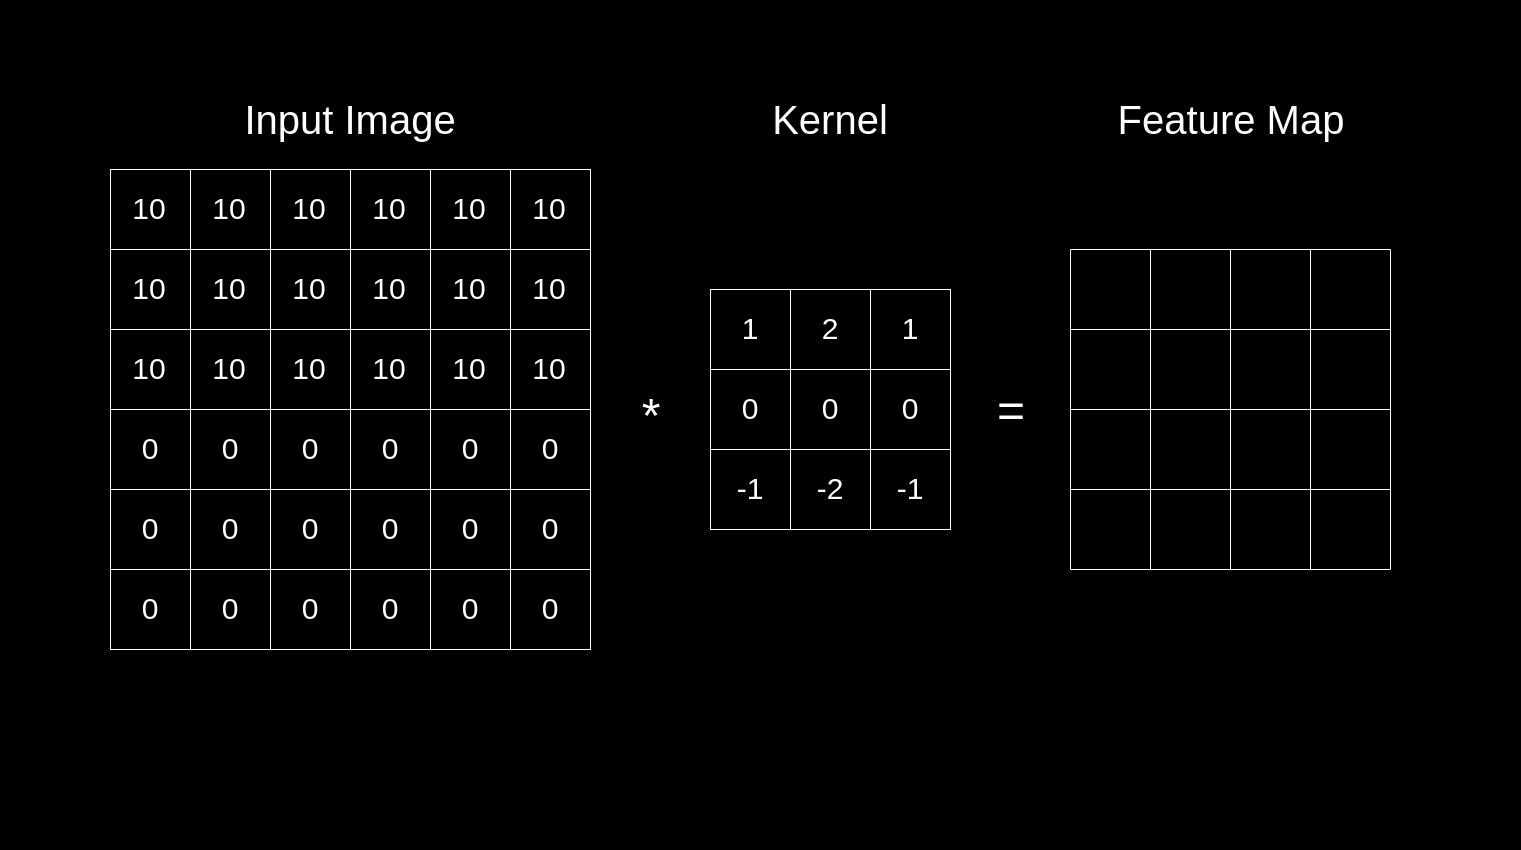

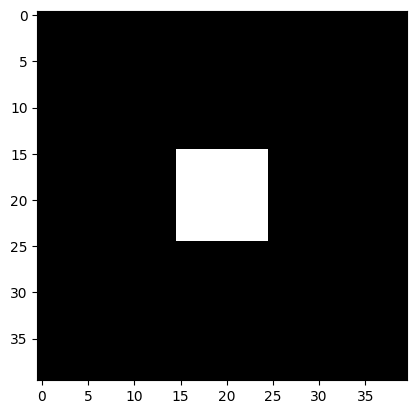

In [ ]:
#Demo using square

im_sq = np.zeros((40,40),dtype = 'uint8')

im_sq[15:25,15:25] = im_sq[0,0] + 255

# im_sq[7:13,7:13] = im_sq[0,0] + 255

plt.imshow(im_sq,cmap = 'gray')
plt.show()

In [ ]:
sobel5y = cv2.getDerivKernels(0, 1, 3, normalize = False)

#getDerivKernels give two vectors whose outer product gives the filtering matrix

np.outer(sobel5y[0], sobel5y[1])

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]], dtype=float32)

In [ ]:
# sobel5y[0]

In [ ]:
# sobel5y[1]

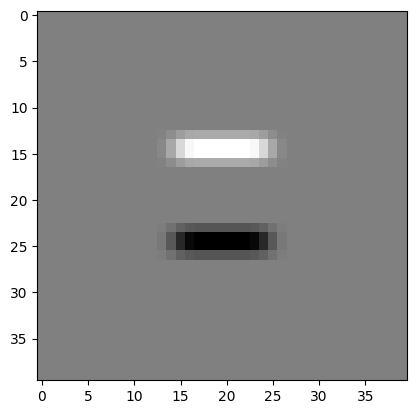

In [ ]:

sobelx_sq = cv2.Sobel(im_sq, cv2.CV_64F, 0,1, ksize = 5)

plt.imshow(sobelx_sq,cmap = 'gray')
plt.show()

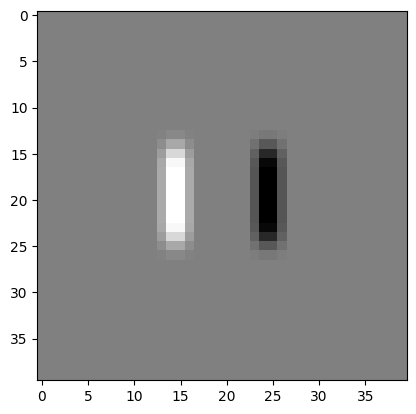

In [ ]:
sobely_sq = cv2.Sobel(im_sq, cv2.CV_64F,1,0,ksize=5)

plt.imshow(sobely_sq,cmap = 'gray')
plt.show()

In [ ]:
# #Magnitude of sobel derivative sqrt((dI/dx)^2 + (dI/dy)^2)

# sobel_sq = np.sqrt(sobelx_sq**2 + sobely_sq**2)

# plt.imshow(sobel_sq, cmap = 'gray')
# plt.show()

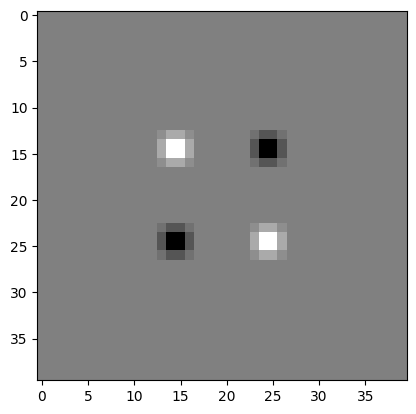

In [ ]:
sobelxy_sq = cv2.Sobel(im_sq, cv2.CV_64F,1,1,ksize=5)

plt.imshow(sobelxy_sq,cmap='gray')
plt.show()

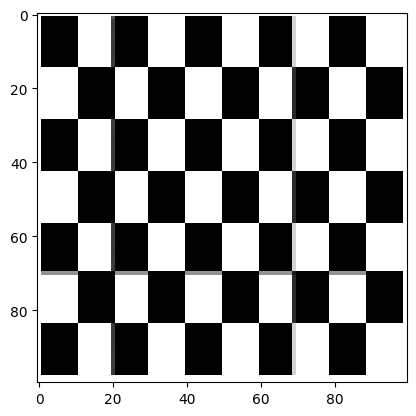

In [ ]:
im_chess = cv2.imread('chessboard.png')


im_chess = cv2.cvtColor(im_chess, cv2.COLOR_BGR2GRAY)

chess_resize = cv2.resize(im_chess, (100,100))

plt.imshow(chess_resize, cmap = 'gray')
plt.show()


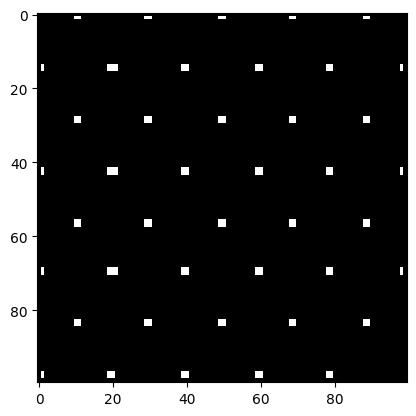

In [ ]:
sobel_ch = cv2.Sobel(chess_resize, cv2.CV_64F, 1,1, ksize = 3)

sobel_bw = cv2.threshold(sobel_ch, 127, 255, cv2.THRESH_BINARY)[1]

plt.imshow(sobel_bw, cmap = 'gray')
plt.show()

**Laplacian**

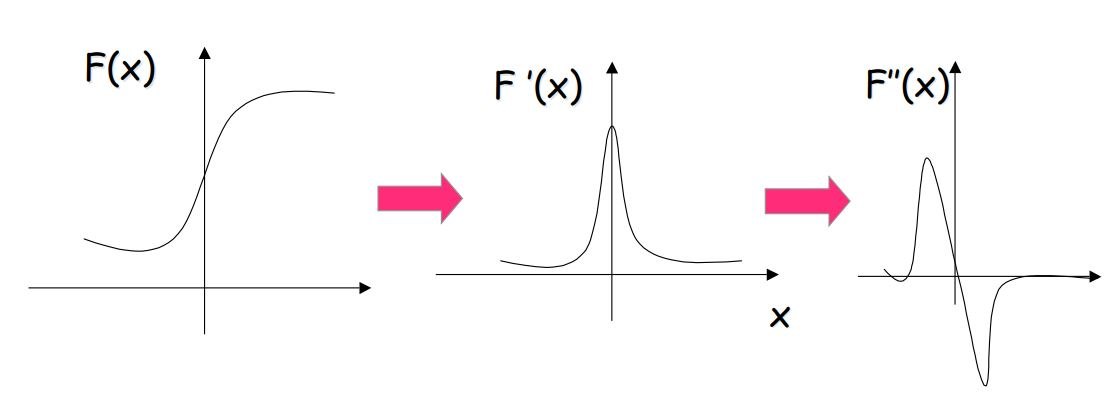

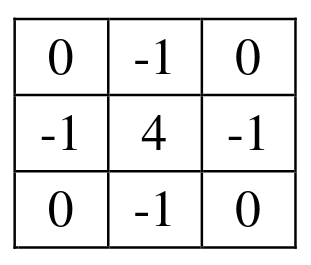

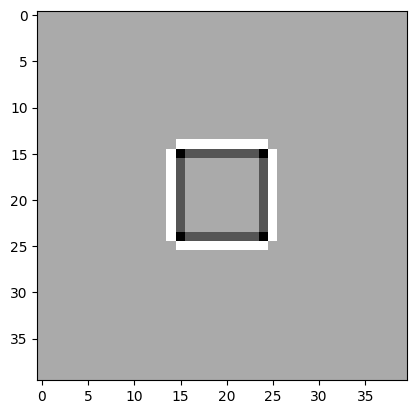

In [ ]:
sq_lap = cv2.Laplacian(im_sq, cv2.CV_64F)

# sq_lap1 = sq_lap.astype('uint8')

plt.imshow(sq_lap, cmap = 'gray')
plt.show()


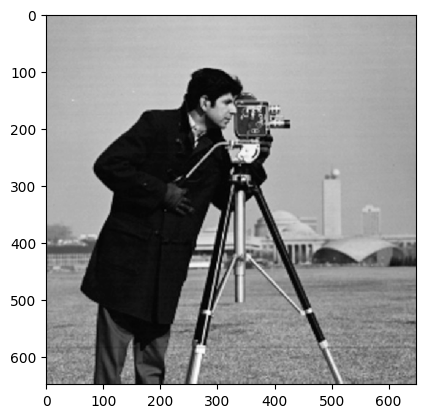

In [ ]:
im_cam = cv2.imread('The cameraman.png')

plt.imshow(im_cam, cmap = 'gray')
plt.show()

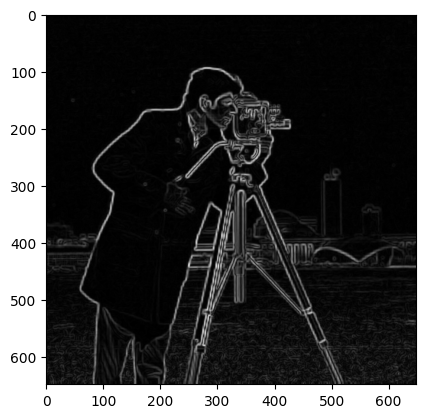

In [ ]:
im_cam_gray = cv2.cvtColor(im_cam, cv2.COLOR_BGR2GRAY)

# In practice we first smoooth the image to remove unwanted noisy gradients

im_cam_blur = cv2.GaussianBlur(im_cam_gray,(3,3),cv2.BORDER_DEFAULT)

sobelx_cam = cv2.Sobel(im_cam_blur,cv2.CV_64F,1,0,ksize=3)
sobely_cam = cv2.Sobel(im_cam_blur,cv2.CV_64F,0,1,ksize=3)

# sobel = abs(sobelx_cat)+abs(sobely_cat)

sobel_cam = np.sqrt(sobelx_cam**2 + sobely_cam**2)

# sobel_cam = cv2.Sobel(im_cam_blur,cv2.CV_64F,1,1,ksize=3)

plt.imshow(sobel_cam,cmap = 'gray')
plt.show()

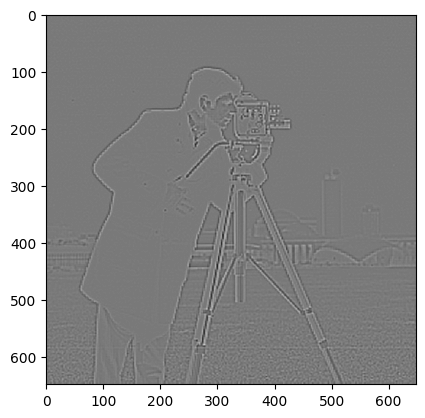

In [ ]:
im_cam_lap = cv2.Laplacian(im_cam_blur, cv2.CV_32F) #Default kernel size is 3

plt.imshow(im_cam_lap, cmap = 'gray')
plt.show()

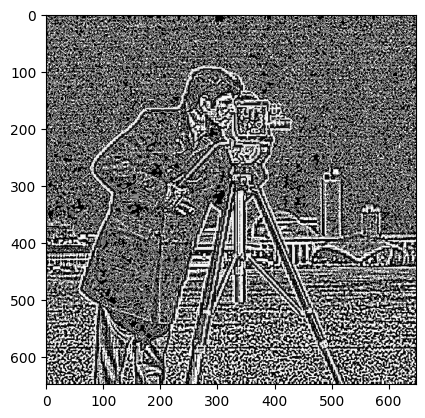

In [ ]:
im_cam_lap1 = im_cam_lap.astype('uint8')

plt.imshow(im_cam_lap1, cmap = 'gray')

**Canny Edge Detection**

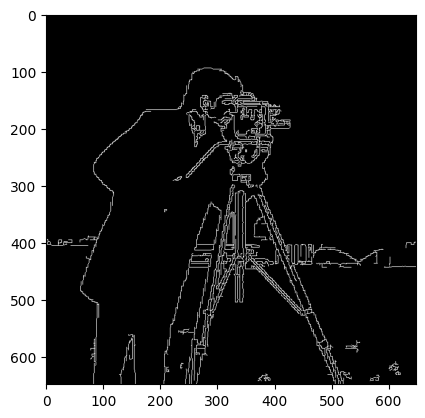

In [ ]:
edges = cv2.Canny(im_cam_gray,100,300)

plt.imshow(edges, cmap = 'gray')

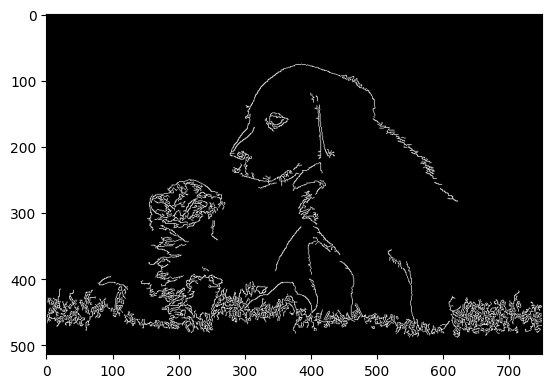

In [ ]:
edges1 = cv2.Canny(im_cat_gray,100,300)

plt.imshow(edges1, cmap = 'gray')

**Some other cool stuff that you can do using OpenCV**

HARRIS CORNER POINT DETECTION

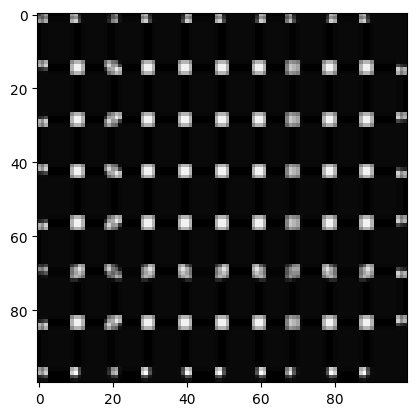

In [ ]:
chess_resize1 = np.float32(chess_resize)
dst = cv2.cornerHarris(chess_resize1,3,3,0.01) #image, neighboursize, sobel ksize, threshol2d

plt.imshow(dst, cmap = 'gray')
plt.show()

**IMAGE STITCHING**

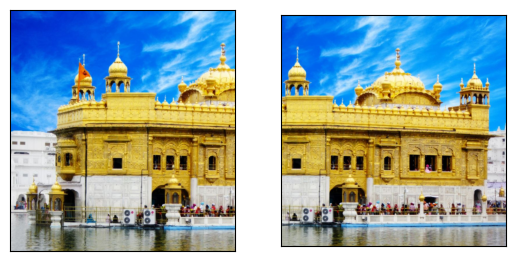

In [ ]:
im1 = cv2.cvtColor(cv2.imread('1.JPG'), cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(cv2.imread('2.JPG'), cv2.COLOR_BGR2RGB)

# im3 = cv2.hconcat(im1,im2)
plt.subplot(1,2,1)
plt.imshow(im1), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(im2), plt.xticks([]), plt.yticks([])

plt.show()

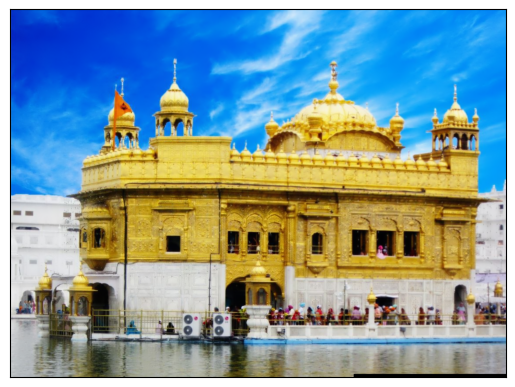

In [ ]:
imgls = [im1, im2] #creating a list

stitcher = cv2.Stitcher.create(1)
status, stitched = stitcher.stitch(imgls)

plt.imshow(stitched), plt.xticks([]), plt.yticks([])
plt.show()

1. Take any colour image and individually display the corresponding red channel, green channel and blue channel with the corresponding colours.


2. Try to find the logic behind the relation of ksize and sigma in Gaussian Kernel.


3. Study the relative advantage and disadvantages of Mean filter and Gaussian filter.


4. Study and use "unsharp mask" algo for sharpening image. The algorithm is based on difference of Gaussians.
